<a href="https://colab.research.google.com/github/carlos-moreno/sandbox-pandas/blob/main/introducao_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv"
df = pd.read_csv(url, sep=";")

In [20]:
linhas, colunas = df.shape
print(f"O Dataframe possui {linhas} linhas e {colunas} colunas\n")

O Dataframe possui 32960 linhas e 9 colunas



In [21]:
nomes_das_colunas = [column for column in df.columns]
print("O Dataframe possui as seguintes colunas:")
print(f" => {', '.join([coluna for coluna in nomes_das_colunas])}\n")

O Dataframe possui as seguintes colunas:
 => Tipo, Bairro, Quartos, Vagas, Suites, Area, Valor, Condominio, IPTU



In [22]:
print("O tipo por coluna do Fataframe é:")
df.dtypes

O tipo por coluna do Fataframe é:


Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

In [23]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [24]:
df['Valor'].mean().round(2)

12952.66

In [25]:
df.groupby('Tipo')[['Valor', 'Condominio', 'IPTU']].mean().round(2).sort_values('Valor')

,Valor,Condominio,IPTU
Tipo,,,
Quitinete,1246.84,427.34,75.79
Pousada/Chalé,1480.00,295.00,NaN
Casa de Vila,1574.37,138.77,183.88
Box/Garagem,1899.76,305.45,125.85
Studio,2400.00,549.00,151.25
Loft,2557.88,869.24,238.24
Flat,4546.19,2027.72,493.17
Apartamento,4744.61,1722.65,686.17
Chácara,4900.00,NaN,NaN


# Média dos Imóveis

<Axes: title={'center': 'Valores por tipo de imóvel'}, ylabel='Tipo'>

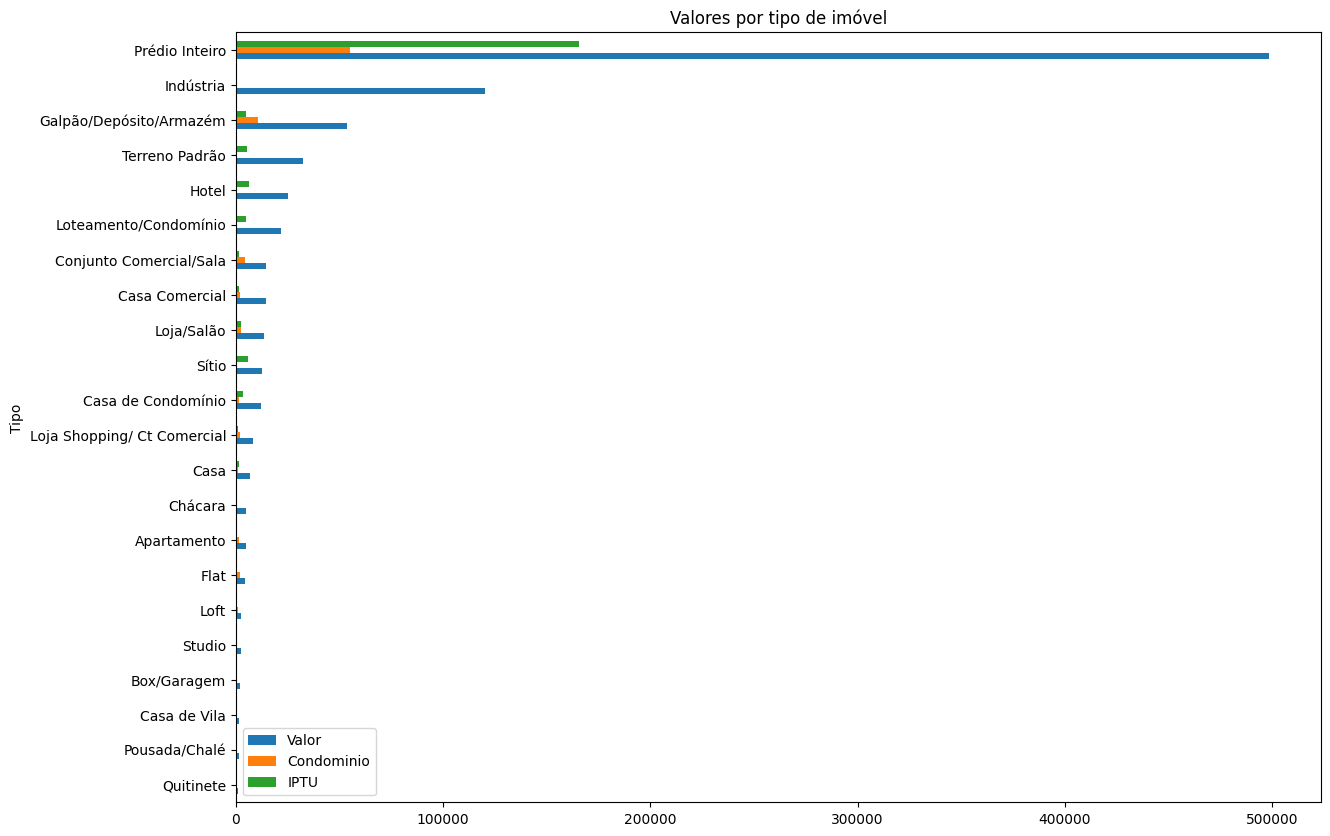

In [26]:
df_preco_tipo = df.groupby('Tipo')[['Valor', 'Condominio', 'IPTU']].mean().round(2).sort_values('Valor')

df_preco_tipo.plot(title="Valores por tipo de imóvel", kind='barh', figsize=(14,10))

# Removendo os imóveis comerciais

In [30]:
imoveis = df.Tipo.unique()
imoveis

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [29]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 'Prédio Inteiro', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Hotel', 'Indústria']

In [31]:
df.query('@imoveis_comerciais in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [33]:
df_imoveis_residencial = df.query('@imoveis_comerciais not in Tipo')
df_imoveis_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [34]:
df_imoveis_residencial.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Studio'], dtype=object)

<Axes: title={'center': 'Valores Médios Por Imóvel Residencial'}, ylabel='Tipo'>

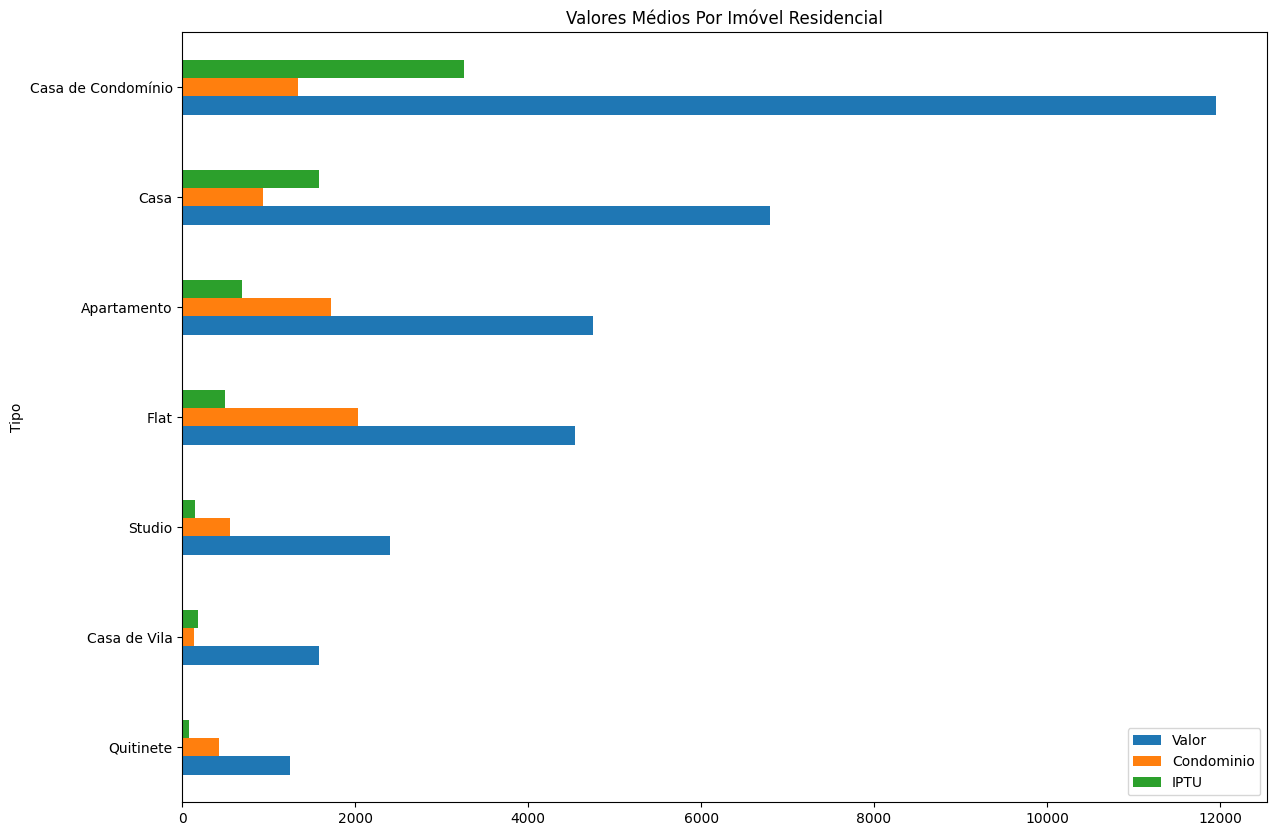

In [37]:
df_preco_imovel_residencial = df_imoveis_residencial.groupby('Tipo')[['Valor', 'Condominio', 'IPTU']].mean().round(2).sort_values('Valor')

df_preco_imovel_residencial.plot(title="Valores Médios Por Imóvel Residencial", kind='barh', figsize=(14,10))